<h1><center>Story 1: Assault Analysis</center></h1>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
# load data
calls = pd.read_csv('../Data//911_calls_for_service_clean_final.csv',index_col='callDateTime',parse_dates=True)
calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)",39.289930,-76.612346
2015-07-13 10:47:00,Medium,CD,911 NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)",39.290674,-76.607160
2015-07-13 10:42:00,Medium,CD,911 NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)",39.289891,-76.612072
2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)",39.298516,-76.618475
2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)",39.311213,-76.676315


In [8]:
# function to set the label of subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 

# Function to set explode value for pie slice
def isExplode(x):
    if x == True:
        return 0.1
    else:
        return 0
    
# Function to draw pie chart and explode the slice with max size
def DrawPieChart(data, title, savefile = np.nan):
    #convert to dataframe
    data = pd.Series.to_frame(data);
    
    data['Size'] = data / data.sum() * 100
    
    # Create new attribute to set the explode slice
    data['Explode'] = data['Size'].max() == data['Size']    
    data['Explode'] = data['Explode'].apply(isExplode)
    
    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(data['Size'], explode = data['Explode'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(data.index, loc="upper right")
    plt.title(title, fontsize=20)
    plt.tight_layout()
    if (savefile != np.nan):
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()
    
    print(data)
    
def SetChartProperties(ax, xlabel, ylabel, labeltext):
    ax.grid('on', which='minor', axis='x' )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    label(ax, labeltext)

In [4]:
# load assaults calls
assault_calls = calls.loc[calls.description.str.contains('ASSAULT')==True]
assault_calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 11:02:00,Medium,CD,COMMON ASSAULT,P151941052,0 S PACA ST,"(39.2880705,-76.6222292)",39.288071,-76.622229
2015-07-13 11:07:00,High,SD,AGGRAV ASSAULT,P151941074,2600 SPELMAN RD,"(39.2485699,-76.6292808)",39.248570,-76.629281
2015-07-13 11:24:00,Medium,SE,COMMON ASSAULT,P151941108,3100 PULASKI HY,"(39.2955346,-76.5735518)",39.295535,-76.573552
2015-07-13 11:36:00,Medium,WD,COMMON ASSAULT,P151941143,2400 WESTWOOD AV,"(39.3086920,-76.6563490)",39.308692,-76.656349
2015-07-13 11:46:00,Medium,WD,COMMON ASSAULT,P151941169,2500 PENNSYLVANIA AV,"(39.3104900,-76.6435070)",39.310490,-76.643507


In [5]:
# total assaults calls
assault_calls.callNumber.count()

146280

In [6]:
#percentage assaults calls.
assault_calls.callNumber.count() / calls.callNumber.count() * 100

5.2245469416327959

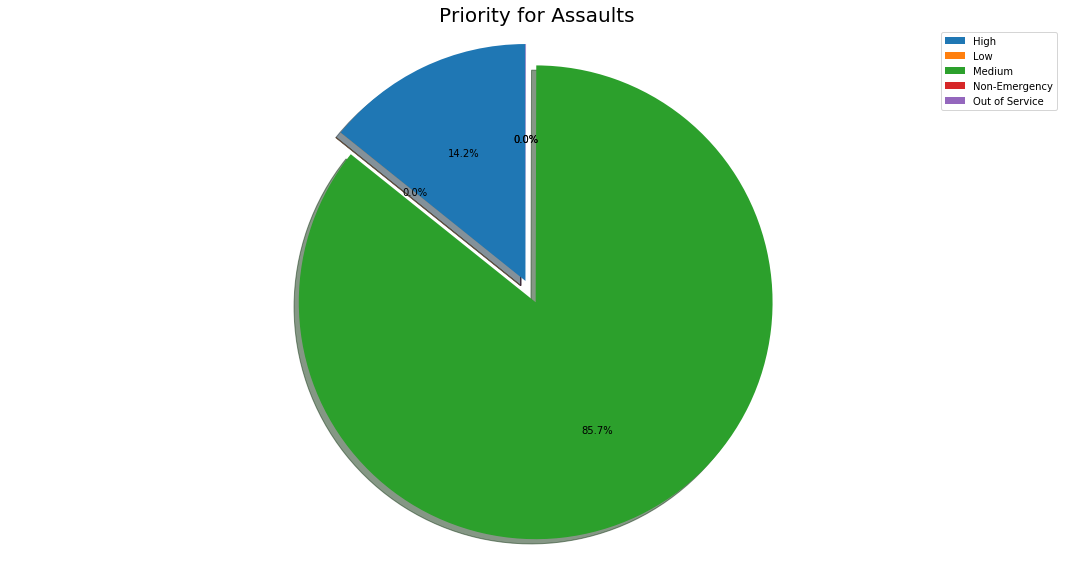

                callNumber       Size  Explode
priority                                      
High                 20833  14.241865      0.0
Low                     16   0.010938      0.0
Medium              125373  85.707547      0.1
Non-Emergency            2   0.001367      0.0
Out of Service          56   0.038283      0.0


In [9]:
# draw chart for prority for assaults.
DrawPieChart(assault_calls.groupby('priority').callNumber.count(), 'Priority for Assaults', 'assault-priority.png')

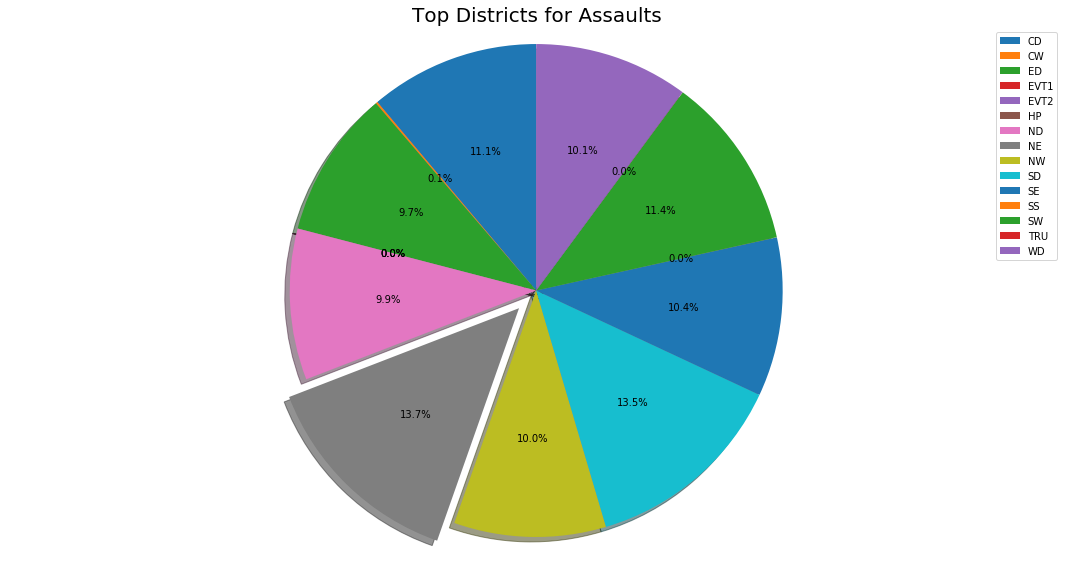

          callNumber       Size  Explode
district                                
CD             16305  11.146432      0.0
CW               186   0.127153      0.0
ED             14153   9.675280      0.0
EVT1               4   0.002734      0.0
EVT2               1   0.000684      0.0
HP                 1   0.000684      0.0
ND             14501   9.913180      0.0
NE             20102  13.742138      0.1
NW             14576   9.964452      0.0
SD             19704  13.470057      0.0
SE             15245  10.421794      0.0
SS                11   0.007520      0.0
SW             16665  11.392535      0.0
TRU               14   0.009571      0.0
WD             14812  10.125786      0.0


In [10]:
# draw chart for  district in assaults.
DrawPieChart(assault_calls.groupby('district').callNumber.count(), 'Top Districts for Assaults', 'assault-districts.png')

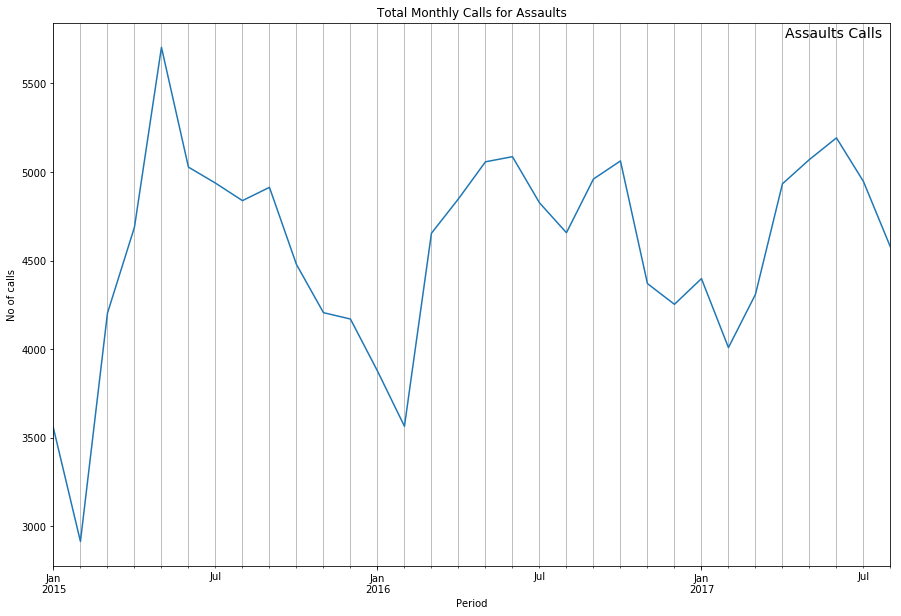

In [11]:
# monthly chart for assaults
ax = assault_calls.resample('M').callNumber.count().plot(figsize=(15,10), title="Total Monthly Calls for Assaults")
SetChartProperties(ax, 'Period', 'No of calls', 'Assaults Calls')
plt.savefig('assault-monthly.png', bbox_inches='tight')

<center><b>May 2015 is highest</b></center>

<b>Related news May 2015</b><br>
http://www.baltimoresun.com/news/maryland/crime/bal-may-2015-baltimores-deadliest-month-in-15-years-sg-storygallery.html<br>

http://www.cnn.com/2015/05/26/us/baltimore-deadliest-month-violence-since-1999/index.html<br>

http://www.cnn.com/2015/05/02/us/freddie-gray-baltimore-death/index.html

According to wikipedia

Increase in violence and decrease in policing[edit]
Baltimore recorded 43 homicides in the month of May, the second deadliest month on record and the worst since December 1971 when 44 homicides were recorded. There have also been more than 100 non-fatal shootings in May 2015.[151] Police commissioner Anthony Batts blames looted drugs, stolen from 27 pharmacies and two methadone clinics, as well as street distribution and turf wars for the spike in crime.

https://en.wikipedia.org/wiki/2015_Baltimore_protests

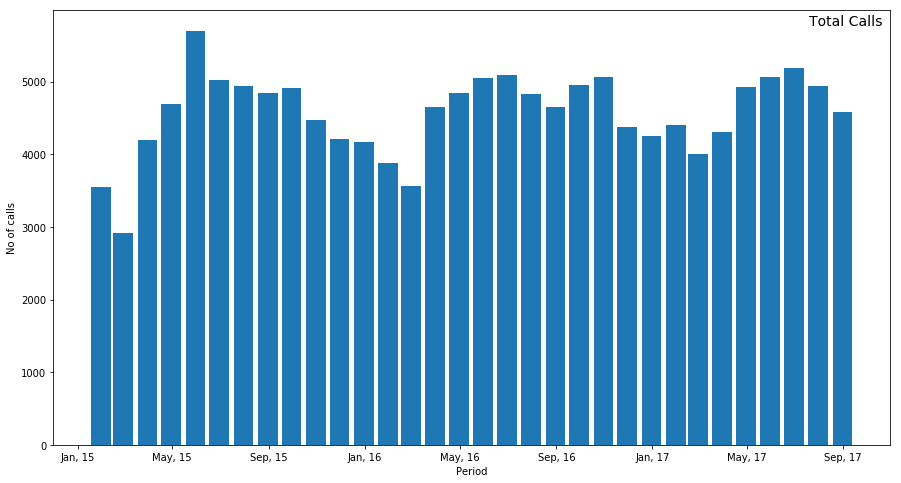

In [67]:
# monthly bar chart for assaults
df = pd.Series.to_frame(assault_calls.resample('M').callNumber.count())
fig, ax = plt.subplots(figsize=(15, 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%b, %y'))
ax.bar(df.index, df['callNumber'], width=25, align='center')
SetChartProperties(ax, 'Period', 'No of calls', 'Total Calls')


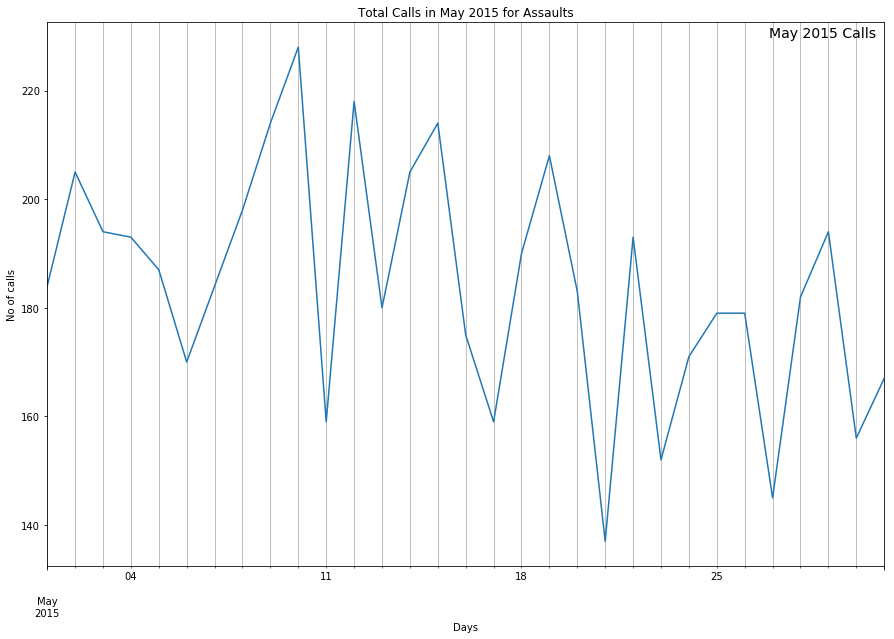

In [12]:
# May 2015 calls chart for assaults
ax = assault_calls['2015-05'].resample('D').callNumber.count().plot(figsize=(15,10), \
    title="Total Calls in May 2015 for Assaults")
SetChartProperties(ax, 'Days', 'No of calls', 'May 2015 Calls')
plt.savefig('assault-may2015.png', bbox_inches='tight')

<center><b>May 10 is highest</b></center>

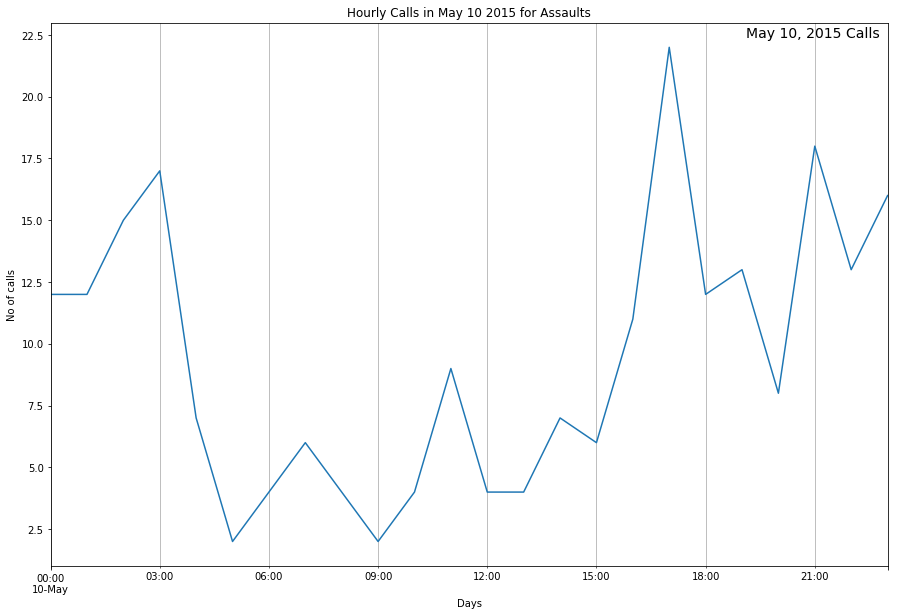

In [69]:
# May 10, 2015 calls chart for assaults
ax = assault_calls['2015-05-10'].resample('H').callNumber.count().plot(figsize=(15,10), title="Hourly Calls in May 10 2015 for Assaults")
SetChartProperties(ax, 'Days', 'No of calls', 'May 10, 2015 Calls')

<center><b>Between 5-6 pm was peak time</b></center>

In [13]:
# create chart for two year compariason
assaults2015 = assault_calls['2015'].resample('M').callNumber.count().reset_index()
assaults2015['month'] = assaults2015['callDateTime']
assaults2015['month'] = assaults2015['month'].apply(lambda x: x.month)
assaults2015.drop('callDateTime', axis=1, inplace=True)
assaults2015.columns = ['2015', 'month']

assaults2016 = assault_calls['2016'].resample('M').callNumber.count().reset_index()
assaults2016['month'] = assaults2016['callDateTime']
assaults2016['month'] = assaults2016['month'].apply(lambda x: x.month)
assaults2016.drop('callDateTime', axis=1, inplace=True)
assaults2016.columns = ['2016', 'month']

mergeassaults = pd.merge(assaults2015, assaults2016)
mergeassaults.set_index('month', inplace=True)

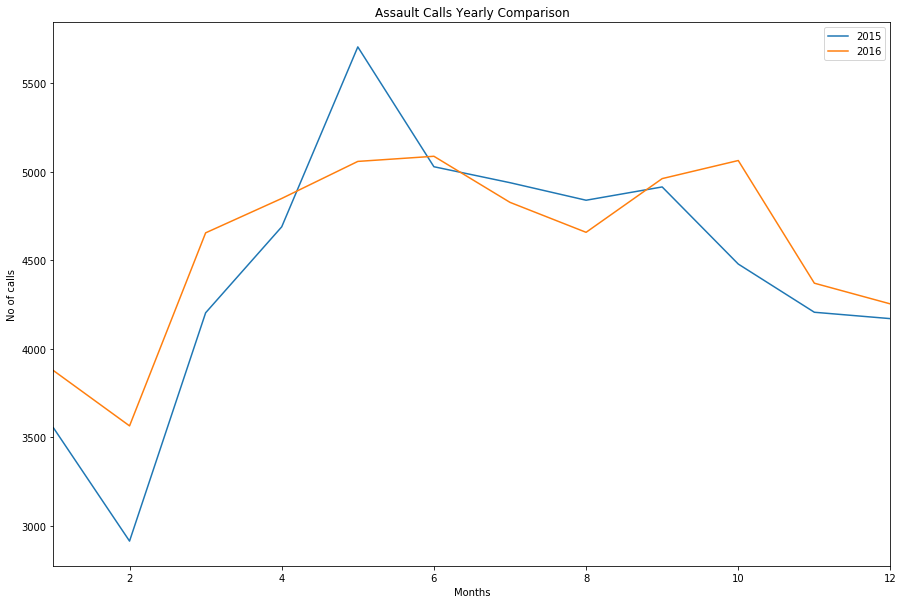

In [14]:
# draw a chart
ax = mergeassaults.plot(figsize=(15,10), title="Assault Calls Yearly Comparison")
SetChartProperties(ax, 'Months', 'No of calls', '')
plt.savefig('assault-2015-2016.png', bbox_inches='tight')